# About the dataset

PJM Hourly Energy Consumption Data
PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The hourly power consumption data comes from PJM's website and are in megawatts (MW).

The regions have changed over the years so data may only appear for certain dates per region.

Reference: https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption/data

# Import libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prophet

plt.style.use('fivethirtyeight')
color_pal =sns.color_palette()

In [49]:
PJME_hourly_df=pd.read_csv('https://raw.githubusercontent.com/rosa-lpz/Data-Science-Portfolio/refs/heads/main/Energy%20Consumption%20Forecasting/data/PJME_hourly.csv')
PJME_hourly_df.head(10)

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
5,2002-12-31 06:00:00,26222.0
6,2002-12-31 07:00:00,28702.0
7,2002-12-31 08:00:00,30698.0
8,2002-12-31 09:00:00,31800.0
9,2002-12-31 10:00:00,32359.0


In [47]:
PJME_hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


# Data Preprocessing

In [52]:
# Change 'Datetime' to datetime type
PJME_hourly_df['Datetime'] = pd.to_datetime(PJME_hourly_df['Datetime'])


In [53]:
PJME_hourly_df.dtypes

,0
Datetime,datetime64[ns]
PJME_MW,float64


In [54]:
PJME_hourly_df.isnull().sum()

,0
Datetime,0
PJME_MW,0


In [55]:
PJME_hourly_df = PJME_hourly_df.set_index('Datetime')
PJME_hourly_df

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


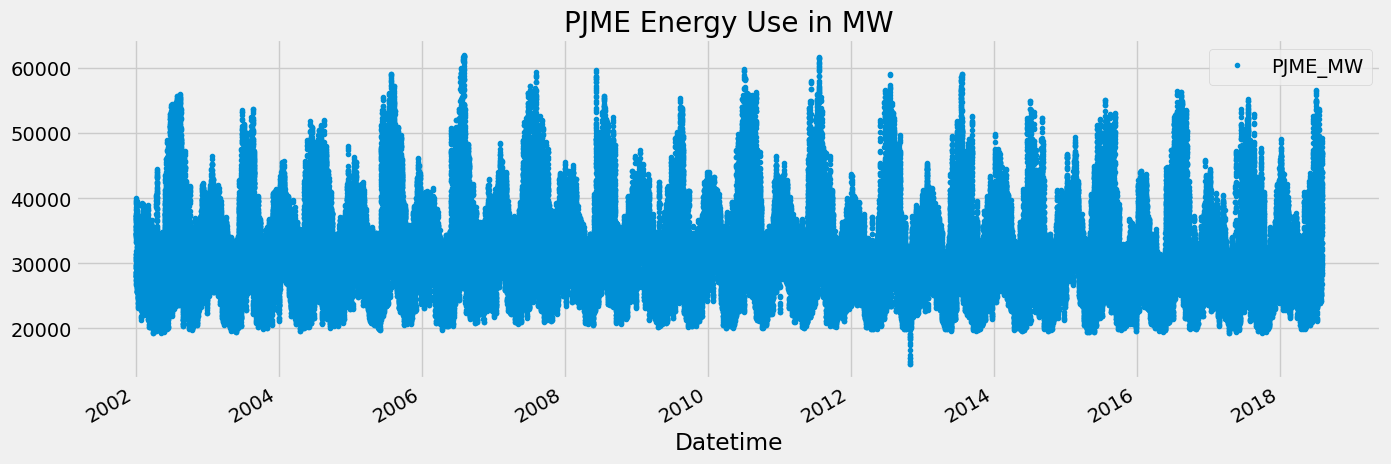

In [56]:
PJME_hourly_df.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJME Energy Use in MW')
plt.show()